In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
image_dimensions = {'height':256, 'width': 256, 'channels':3}

In [3]:
class Classifier:
    def __init__():
        self.model = 0
        
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [4]:
class Meso4(Classifier):
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                          loss = 'mean_squared_error',
                          metrics = ['accuracy'])
    
    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                          image_dimensions['width'],
                          image_dimensions['channels']))
        
        x1 = Conv2D(8, (3,3), padding='same', activation='relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2,2), padding='same')(x1)
        
        x2 = Conv2D(8, (5,5), padding='same', activation='relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2,2), padding='same')(x2)
        
        x3 = Conv2D(16, (5,5), padding='same', activation='relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2,2), padding='same')(x3)
        
        x4 = Conv2D(16, (5,5), padding='same', activation='relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4,4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation='sigmoid')(y)
        
        return Model(inputs=x, outputs=y)

In [5]:
meso = Meso4()
meso.load('./weights/Meso4_DF')

In [6]:
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
            './data/',
            target_size=(256,256),
            batch_size=1,
            class_mode='binary'
)

generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

Predicted likelihood: 0.9361
Actual label: 1

Correct prediction: True


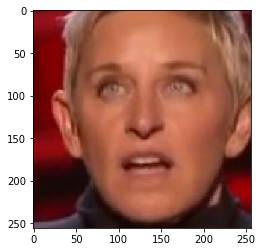

In [40]:
X, y = generator.next()

print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")


plt.imshow(np.squeeze(X));


In [41]:
import lime
from lime import lime_image

In [42]:
explainer = lime_image.LimeImageExplainer()

In [43]:
explanation = explainer.explain_instance(np.squeeze(np.array(X)).astype('double'), meso.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
from skimage.segmentation import mark_boundaries

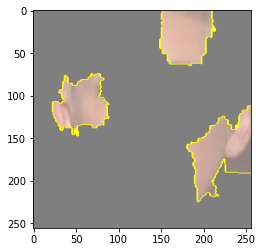

In [45]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [39]:
x = np.expand_dims(temp, axis=0)
print(f"Predicted likelihood: {meso.predict(x)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(x)[0][0])==y[0]}")

Predicted likelihood: 0.9940
Actual label: 0

Correct prediction: False
